In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

## Part a

In [7]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''

    #######################
    image = image.astype(np.uint8)
    hist = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    #######################

    return hist

In [11]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''

  #######################
  hist = calc_hist(channel)
  cdf = np.zeros(256, dtype=float)
  cdf[0] = hist[0]
  for i in range(1, 256):
      cdf[i] = cdf[i-1] + hist[i]
  cdf /= np.size(channel)
  #######################

  return cdf

In [9]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:
    output_image_channel = src_image[:, :, channel]
    ref_image_channel = ref_image[:, :, channel]
    cdf_output_image = calc_cdf(output_image_channel)
    cdf_ref_image = calc_cdf(ref_image_channel)
    j = 0
    for i in range(256):
      if (cdf_output_image[i] != 0 and i == 0) or (i != 0 and cdf_output_image[i] != cdf_output_image[i-1]):
        z = j
        for k in range(z, 256):
          if cdf_output_image[i] <= cdf_ref_image[k]:
            if (cdf_output_image[i] - cdf_ref_image[j]) < (cdf_ref_image[k] - cdf_output_image[i]):
              output_image[:, :, channel][output_image_channel == i] = j
            else:
              output_image[:, :, channel][output_image_channel == i] = k
            j = k
            break

  return output_image

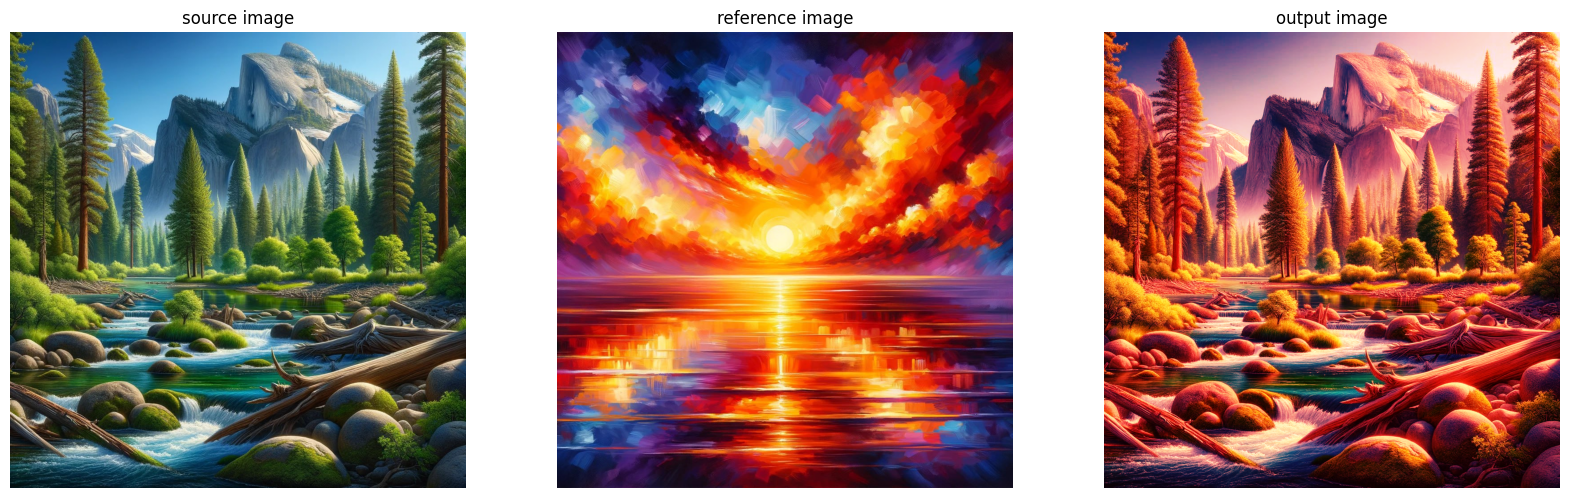

In [12]:
# Do not change this cell
src = cv2.imread('src.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

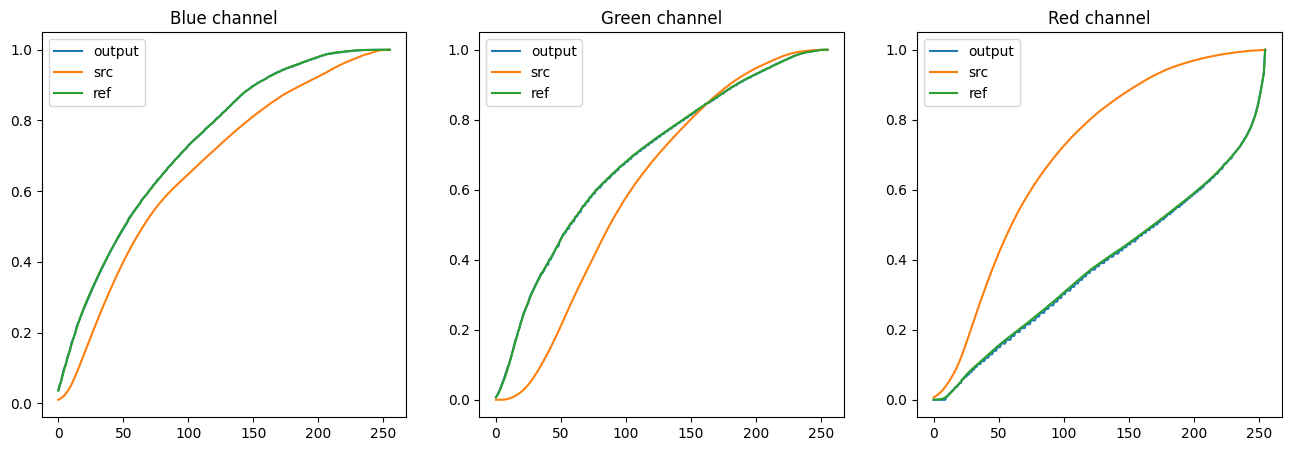

In [13]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)